In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
# read in dataframe
df_orig = pd.read_csv('final_data_files/uncrowded_withresid_m4.csv')

df = df_orig[(np.isfinite(df_orig.mag_j)) & (np.isfinite(df_orig.mag_h)) & (np.isfinite(df_orig.mag_k)) &
        (np.isfinite(df_orig.mag_3)) & (np.isfinite(df_orig.mag_4))]

df1 = df[df.type == 0]
df2 = df[df.type == 1]

# show column names for reference
print df.columns.values

['id' 'mag_j' 'merr_j' 'type' 'per' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4']


/Users/mdurbin/STScI/ssbx/variants/common/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  if __name__ == '__main__':
/Users/mdurbin/STScI/ssbx/variants/common/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  from IPython.kernel.zmq import kernelapp as app
/Users/mdurbin/STScI/ssbx/variants/common/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


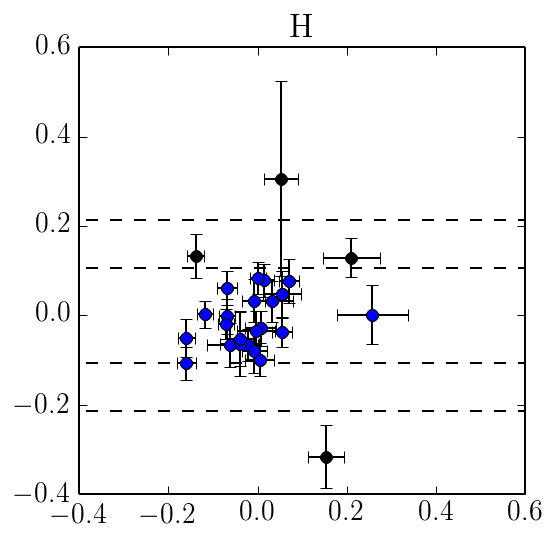

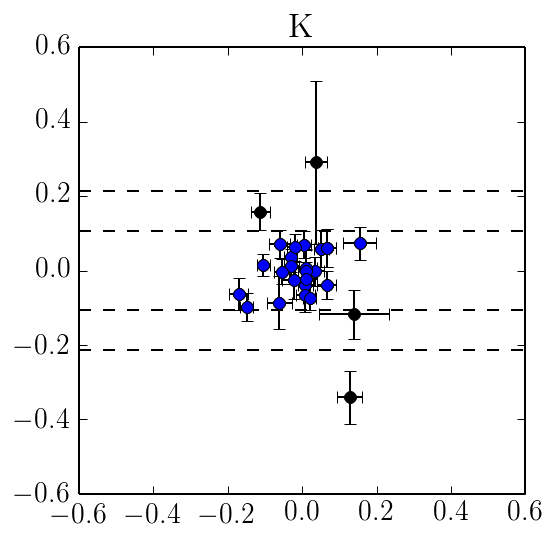

In [7]:
df['resid_h_3'] = df['resid_m4_h'] - df['resid_m4_3']
df['resid_k_3'] = df['resid_m4_k'] - df['resid_m4_3']
for i in ['h','k']:
    df['resid_' + i + '_3'] = df['resid_m4_' + i] - df['resid_m4_3']
    if i == 'h':
        clipped_h = sigma_clip(df['resid_h_3'], 1)
        bad_only_h = df[clipped_h.mask]
    if i == 'k':
        clipped_k = sigma_clip(df['resid_k_3'], 1)
        bad_only_k = df[clipped_k.mask]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, aspect='equal')
    sig = np.std(df['resid_' + i + '_3'])
    ax.errorbar(df['resid_m4_' + i], df['resid_' + i + '_3'],
                xerr=df['merr_' + i], yerr=df['merr_3'], fmt='o', color='k')
    if i == 'h':
        ax.plot(df['resid_m4_h'], clipped_h, 'o')
    if i == 'k':
        ax.plot(df['resid_m4_k'], clipped_k, 'o')
    #ax.set_ylim(-0.3,0.4)
    ax.set_xlim(ax.get_ylim())
    ax.hlines(1*sig, -0.6, 0.6, linestyle='--')
    ax.hlines(-1*sig, -0.6, 0.6, linestyle='--')
    ax.hlines(2*sig, -0.6, 0.6, linestyle='--')
    ax.hlines(-2*sig, -0.6, 0.6, linestyle='--')
    ax.set_title(i.upper())

In [8]:
bad_only_h

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_3,resid_k_3,
64,103,13.620342,0.017550,1,0.328852,13.409081,0.040005,13.376559,0.033546,12.959676,0.070904,13.024156,0.066239,0.108284,0.152610,0.128188,0.469198,0.393236,-0.316589,-0.341011,...
67,107,13.596613,0.017088,0,0.514102,13.339657,0.037823,13.300744,0.030043,13.535131,0.218684,13.350744,0.076410,0.031871,0.052246,0.037048,-0.253647,-0.100279,0.305894,0.290695,...
87,169,13.805114,0.012780,1,0.319116,13.735499,0.019423,13.652310,0.025181,13.734405,0.049790,14.001441,0.115631,-0.044367,-0.138620,-0.112114,-0.270839,-0.545167,0.132219,0.158725,...
99,357,13.692375,0.027059,1,0.297775,13.468106,0.063542,13.467598,0.044630,13.462164,0.043815,13.374933,0.040557,0.142350,0.209815,0.154242,0.081303,0.170891,0.128512,0.072939,...


In [9]:
bad_only_k

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_3,resid_k_3,
64,103,13.620342,0.017550,1,0.328852,13.409081,0.040005,13.376559,0.033546,12.959676,0.070904,13.024156,0.066239,0.108284,0.152610,0.128188,0.469198,0.393236,-0.316589,-0.341011,...
67,107,13.596613,0.017088,0,0.514102,13.339657,0.037823,13.300744,0.030043,13.535131,0.218684,13.350744,0.076410,0.031871,0.052246,0.037048,-0.253647,-0.100279,0.305894,0.290695,...
70,120,13.525268,0.049242,0,0.548537,13.071737,0.078913,13.135252,0.093683,12.958440,0.065915,12.926700,0.055272,0.047438,0.257124,0.138512,0.256313,0.257456,0.000812,-0.117800,...
87,169,13.805114,0.012780,1,0.319116,13.735499,0.019423,13.652310,0.025181,13.734405,0.049790,14.001441,0.115631,-0.044367,-0.138620,-0.112114,-0.270839,-0.545167,0.132219,0.158725,...
